In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '../../../'))  # return the projest's root folder
sys.path.append(project_root)
from utils import get_unique_cycle_soh, prepare_scatter_data

2025-01-28 20:34:26.721052: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-28 20:34:26.730010: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-28 20:34:26.813734: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-28 20:34:26.893339: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738092866.957719     818 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738092866.97

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

random_seed = 42
np.random.seed(random_seed)

In [3]:
# load the data from file
folder_path = ''
data = pd.read_csv(f'{folder_path}nasa_st_data.csv')

In [4]:
# rename the columns
col_renamed_dict = {'Date': 'Date',
                    'cycle': 'cycle',
                    'voltage': 'voltage',
                    'current_measured': 'current',
                    'relativeTime': 'relativeTime',
                    'SOH': 'SOH',
                    'SOC': 'SOC'}
data = data.rename(columns=col_renamed_dict)
print(data.columns)

Index(['cycle', 'ambient_temperature', 'Date', 'capacity', 'voltage',
       'current', 'temperature', 'current_load', 'voltage_load', 'time', 'SOC',
       'SOE', 'SOH', 'SOH_aval', 'relativeTime'],
      dtype='object')


In [ ]:
# split tha dataset into train, valid, test
# Identify unique cycles
unique_cycles = data['cycle'].unique()
print("Total unique cycles:", len(unique_cycles))

# Example: 80% train+val, 20% test
trainval_cycles, test_cycles = train_test_split(
    unique_cycles, test_size=0.2, random_state=42
)

# Then within trainval, do 80% train, 20% val
train_cycles, val_cycles = train_test_split(
    trainval_cycles, test_size=0.2, random_state=42
)

train = data[data['cycle'].isin(train_cycles)]
valid = data[data['cycle'].isin(val_cycles)]
test = data[data['cycle'].isin(test_cycles)]

print("Train cycles:", len(train_cycles))
print("Valid cycles:", len(val_cycles))
print("Test cycles:", len(test_cycles))

Total unique cycles: 164
Train cycles: 104
Valid cycles: 27
Test cycles: 33


In [6]:
# save the splited dataset
data_save_path = '../'
train.to_csv(f'{data_save_path}train.csv', index=False)
valid.to_csv(f'{data_save_path}valid.csv', index=False)
test.to_csv(f'{data_save_path}test.csv', index=False)

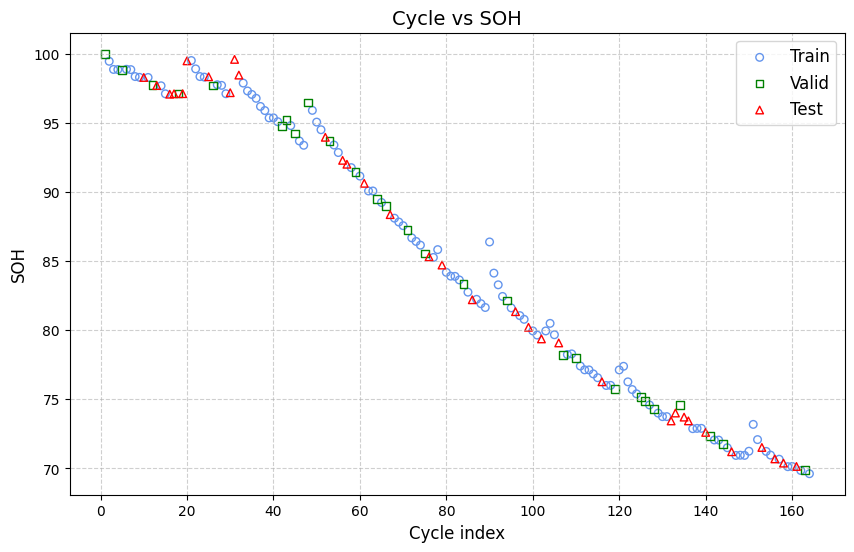

In [7]:
# The result is three dictionaries: train_info, valid_info, and test_info
train_info, valid_info, test_info = [get_unique_cycle_soh(dataset) for dataset in [train, valid, test]]

plt.figure(figsize=(10, 6))
plt.scatter(*prepare_scatter_data(train_info), 
            facecolors='none', edgecolors='cornflowerblue', label='Train', s=30, marker='o')
plt.scatter(*prepare_scatter_data(valid_info), 
            facecolors='none', edgecolors='green', label='Valid', s=30, marker='s')
plt.scatter(*prepare_scatter_data(test_info), 
            facecolors='none', edgecolors='red', label='Test', s=30, marker='^')

plt.title("Cycle vs SOH", fontsize=14)
plt.xlabel("Cycle index", fontsize=12)
plt.ylabel("SOH", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()
